### In linear regression, what we want is to find the best line that fits our data.
This means we want the difference between all the actual data points and the predicted values on the line to be as small as possible.

To measure this difference, we use something called the Mean Squared Error, or MSE, as our loss function.
When this loss is the smallest, it means our line fits the data the best.

So, how do we find that line?
We use a method called gradient descent to find the best values of the slope and the bias.

The idea is that if we plot the relationship between the loss and the slope, we’ll see a kind of curve.
We want to find the lowest point on that curve — where the loss is minimal.

The gradient, or the derivative, tells us which direction the loss increases fastest.
Therefore, if we go in the opposite direction of the gradient, the loss will decrease.

The learning rate tells us how big each step should be when we move in that direction.

By repeating this process again and again — updating the slope and bias step by step —
we eventually move down to a point where the loss is very small.
That’s how we find the final, best-fitting line for our data.

# Workshop 6: Logistic Regression

### Logistic Regression predicts whether something is true or false, instead of predicting something continuous like linear regression.

### Also instead of fitting a line to the data, logistic regression fits an S shaped logistic function. The curve gose from 0 to 1, and that means the curve tells you the probability that whaterever something is true or not, so it's usually for classification

### One big difference between linear regression and logitic regression is how the line is fit to the data. With linear regression, we fit the line using least squares like MSE this loss function. In other words,we find the line that minimizes the sum of the squares of those residuals.

### Logistic regression doesn't have the same concept of a residual, so it can't use least squares. Instead it uses something called maximum likelihood, in a nutshell, you pick a probability scaled like the line and you use that to calculate the likelihood of other similar x value corresponded with y value. And you do that for all of the values. And lastly you multiply all of those likelihoods together. That's the likelihood of the data given this line. Then you shift the line and and calculate a new likelihood of the data and again, again. Finally, the curce with the maxium value for the likelihood is selected.

### In summary, logistic regression can be used to classify samples, and it can use different styles of data like different features that might influence the results to do that classification. And it can also be used to assess what variables are useful for classfying samples.

### For example, obesity, gender age weight astrological sign.

## 1. Linear Equation
$$\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

### The relationship between features and outcomes,how the features relate to the results.

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [3]:
# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)
# n_features=2	每个样本有 2 个特征（即二维平面上的点）
# n_redundant=0	没有冗余特征
# n_informative=1	只有一个特征是真正有助于分类的
# n_clusters_per_class=1	每个类别只有一个聚类中心（简单可视化）
# random_state=2043	设置随机种子，保证结果可复现


In [4]:
print(x)

[[ 2.12632807 -1.31928536]
 [-0.67593598 -1.7974884 ]
 [-0.81605888 -0.78550887]
 [-1.61756456  0.14999578]
 [-0.33416261 -0.04238901]
 [ 1.32129725  1.6092511 ]
 [ 1.03129785  0.96796472]
 [-0.43416401 -0.55269105]
 [ 1.39753945  0.22501799]
 [-1.41121456 -0.13013808]
 [-1.27758974  0.9116049 ]
 [ 0.64991765  0.82721456]
 [-0.83838836  0.40721386]
 [-0.52571606 -0.51440965]
 [ 0.19215198 -0.78727997]
 [ 1.15730564  1.61099008]
 [-0.23728438  0.60087715]
 [ 0.37557434 -1.22798035]
 [ 0.4993374  -0.49127142]
 [ 0.00747475  1.63383751]
 [ 1.03469068  1.4966832 ]
 [ 1.15474533  0.81026778]
 [-1.52564088 -1.8045477 ]
 [-1.21334055  0.61629581]
 [ 0.17848744  0.15161083]
 [-0.760539   -0.6749736 ]
 [-1.12571836 -0.84262045]
 [ 1.89783067  0.74346716]
 [ 2.73206408 -0.54518121]
 [-0.27743518 -0.47509375]
 [-0.98605721  0.77286184]
 [ 0.65415162  1.45017657]
 [ 0.26341715 -0.02330013]
 [-0.49783567 -1.49723608]
 [-0.24827367  0.35981603]
 [-2.18861792  1.42800996]
 [-0.69459128  0.50171632]
 

In [5]:
print(y)

[1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1]


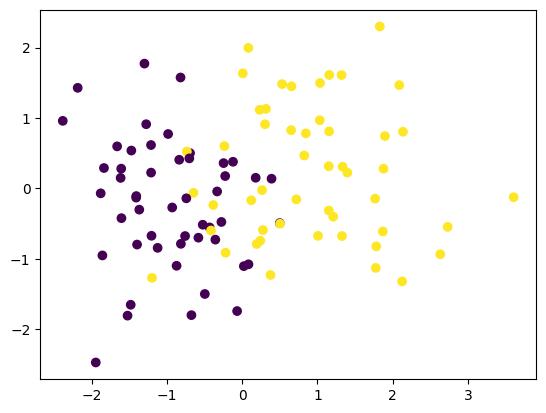

In [6]:
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
# the reason why we set the 1 bias is to make sure if theta and x is zero, we still the output not zero
plt.scatter(X[:,1], X[:,2], c=y)

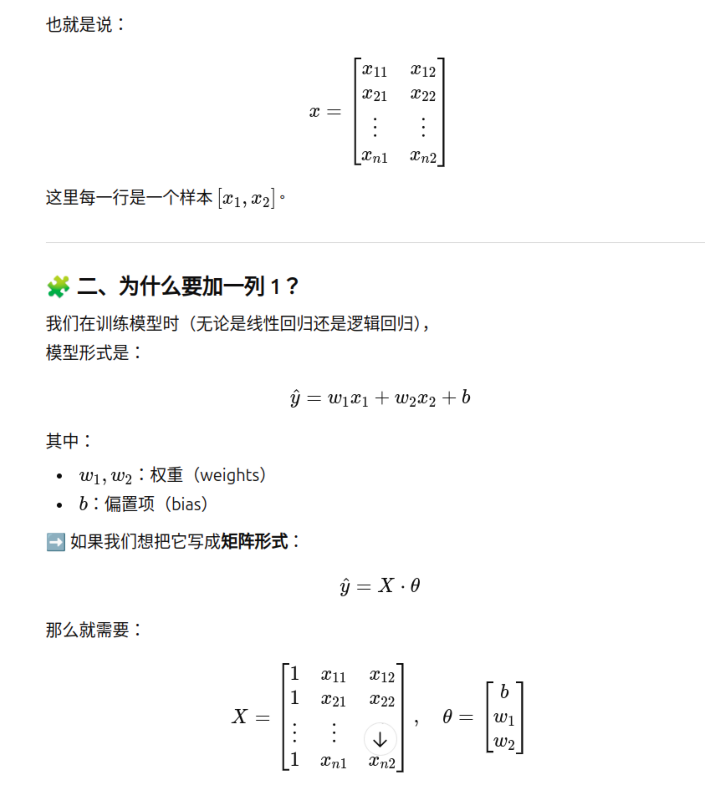

In [7]:
img = plt.imread('test1.png')   # 替换为你的图片路径
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

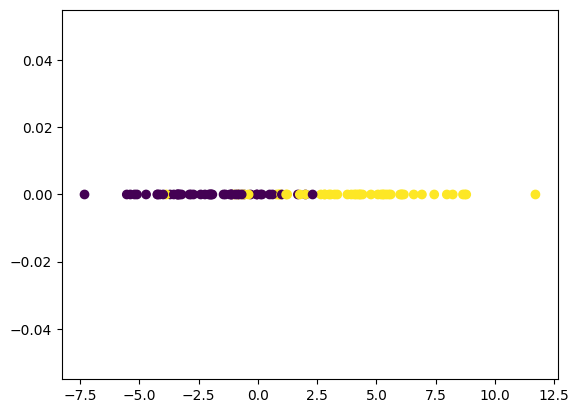

In [8]:
# y=w1*x1+w2*x2+b
#theta = np.array([80,2,100])
theta = np.array([1,3,1])
linear_sum = X@theta
# linear_sum equals X matrix multiplied by theta
plt.scatter(linear_sum, [0 for i in range(len(linear_sum))], c=y)
# convert discrete data into linear

## 2. Logistic Regression
### 2.1 Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$

This is the hypothetical function of logistic regression, also named as the prediction function.

#### Exercise 1. Could you use `Matplotlib` library to draw the graphic of function
$$
h_\theta(z)=\frac{1}{1+e^{-z}}
$$

### We use the sigmoid function in logistic regression because it turns any real number — which can be very large or very small — into a value between 0 and 1.
### This makes it perfect for modeling probabilities.
### It is smooth and differentiable, so we can optimize it easily with gradient descent.
### It provides a clear decision boundary around 0.5, which separates two classes naturally.


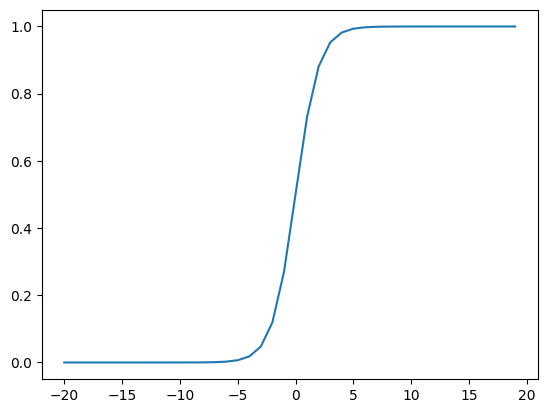

In [9]:
z=np.array([i for i in range(-20,20)])
hz = 1/(1+1/np.exp(z)) # 欧拉数（Euler’s number）
plt.plot(z,hz)

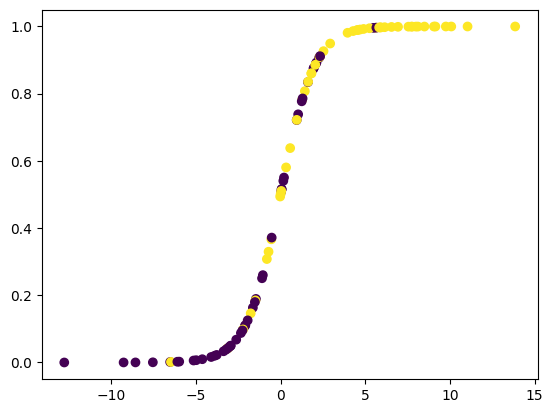

In [10]:
theta = np.array([1,2,4])  # model parameters
linear_sum = X@theta
hz = 1/(1+1/np.exp(linear_sum))
plt.scatter(linear_sum, hz, c=y)

### 2.2 Cost function
$$
\begin{aligned}
&J(\theta)=\frac{1}{m} \sum_{i=1}^m \operatorname{Cost}\left(h_\theta\left(x^i\right), y^i\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

### We’re not going to do the mathematical derivation of the cost function here. What you need to remember is that this is the cost function of logistic regression.

#### Exercise 2. Could you interpret the equation above to Python code?

In [11]:
Loss = (-1/len(y))*sum(y * np.log(hz) + (1-y) * np.log(1-hz))
Loss

0.6760309826740135

### 2.3 Gradient Descent
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

### START
Alright everyone, in today’s class,
we’re going to continue with our topic on logistic regression.

But first, let’s do a quick review of what we learned last time.

In logistic regression, we start with a dataset that has two features,
which we call x1 and x2

And there’s a target value y that depends on these two features.

The value of y is either 0 or 1 —
you can think of that as true or false, or yes or no.

Then, we express this data using a linear equation,
where each feature x is associated with a weight,
which we call theta (θ).

So, does anyone remember what theta actually means?

Right — theta determines how much each feature influences the result.
In other words, we want to find the most suitable set of theta values
that make our model fit the data best.

Once we’ve found the best theta,
we can use it to predict new values of y,
even if we only know the feature values x1 and x2

Does that make sense so far?

Then, we talked about the sigmoid function,
which maps the linear score into a value between 0 and 1.
It basically turns the linear output into a probability.

So in short, logistic regression is just a linear model
followed by a sigmoid function
that converts the linear output into a probability —
perfect for binary classification.

Does that make sense?

After that, we introduced the cost function for the sigmoid model —
also known as the log loss or cross-entropy loss.

You don’t need to remember all the mathematical derivations here,
just keep in mind that the cost function measures
how far the predicted probability is from the true label.

The smaller the loss,
the better our model’s thetas fit the data.

Finally, we use gradient descent to minimize this loss —
that means we keep adjusting theta
in the direction where the loss decreases fastest.

The gradient shows us that direction,
and the learning rate decides how big a step we take each time.

We keep repeating this process until the loss becomes very small —
and that’s when we’ve found our most suitable theta.

#### Exercise 3. Complete the rest steps of logistic regression.

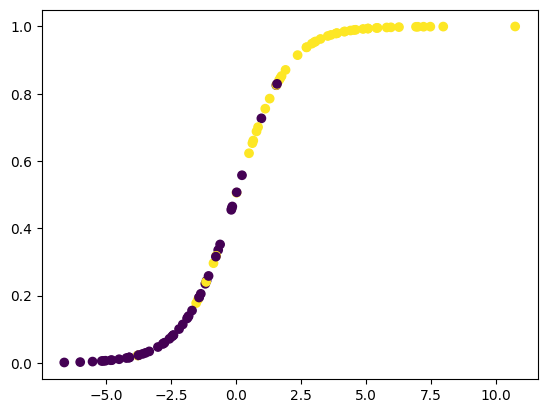

In [12]:
theta = np.array([1,2,4],dtype="float64")
linear_sum = X@theta
hz = 1/(1+1/np.exp(linear_sum)) # it computes predictions using the sigmoid function,

lr = 0.001
loss_list=[]
for epoch in range(2000):
    
    Loss = (-1/len(y))*sum(y * np.log(hz) + (1-y) * np.log(1-hz)) #Measures the error with the log loss
    loss_list.append(Loss)
    
    theta-=lr*X.T@(hz-y) # Updates the parameters to reduce that error,
    hz = 1/(1+np.exp(-(X@theta))) # give now parameter to the model


plt.scatter(X@theta, hz, c=y) #And finally visualizes how the model separates the two classes by their predicted probabilities.

In [13]:
print(theta)

[0.3799133  2.8913621  0.54913743]


In [23]:
x_new = np.array([1, 0.5, 1.2])
z = x_new @ theta
h = 1 / (1 + np.exp(-z))
predicted_class = 1 if h >= 0.5 else 0
#We use 0.5 as the cutoff because sigmoid outputs a probability, and 0.5 represents the midpoint — above 0.5 we predict class 1, below 0.5 we predict class 0.

print(f"Linear sum (z): {z:.4f}")
print(f"Predicted probability (h): {h:.4f}")
print(f"Predicted class: {predicted_class}")

Linear sum (z): 2.4846
Predicted probability (h): 0.9231
Predicted class: 1


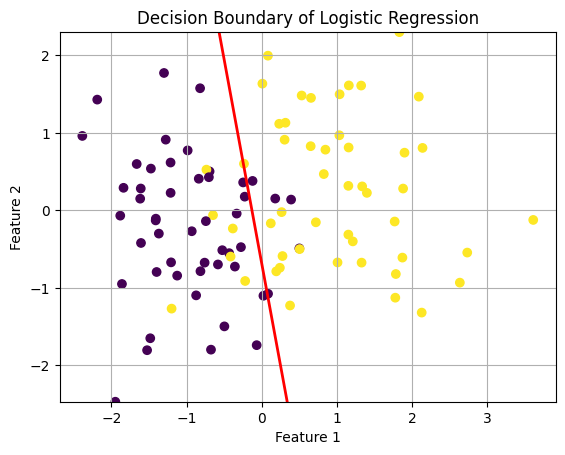

In [ ]:
plt.scatter(X[:,1], X[:,2], c=y)

x_line = np.linspace(X[:,1].min(), X[:,1].max(), 100) # This line creates 100 points of x₁ within the range of the data.
y_line = -(theta[0] + theta[1]*x_line) / theta[2]
# draw the line shows the relationship between x₁ and x₂ at the decision boundary.It is the line where the model predicts probability = 0.5, which separates class 0 from class 1.

plt.plot(x_line, y_line, color='red', linewidth=2, label='Decision boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Logistic Regression")
plt.ylim(X[:,2].min(), X[:,2].max()) 
plt.grid(True)
plt.show()


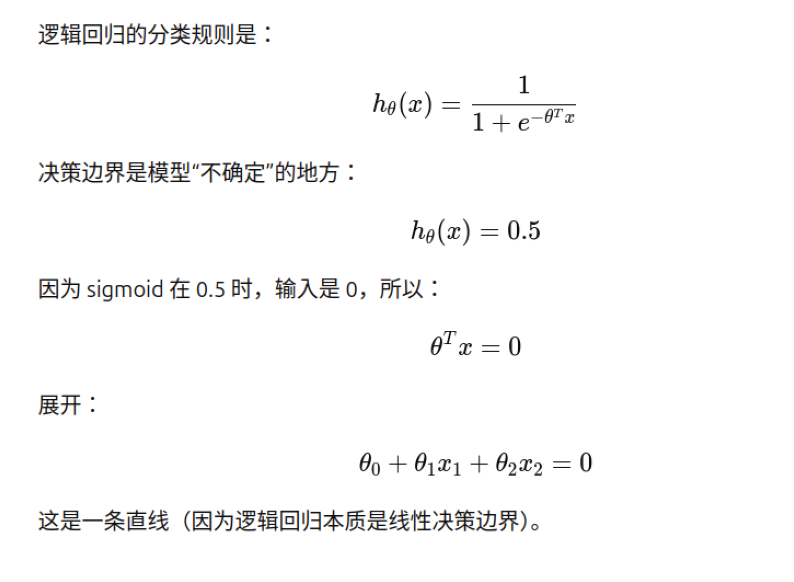

In [21]:
img = plt.imread('test2.png') 
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

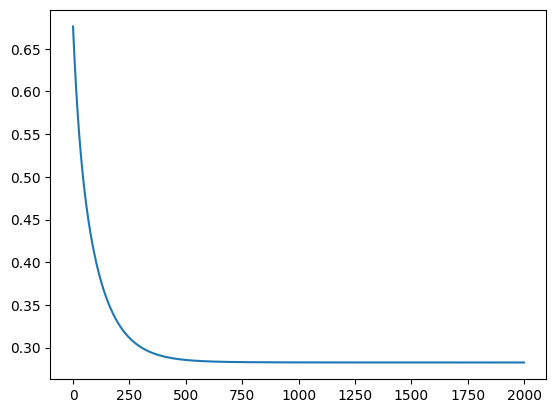

In [16]:
plt.plot(loss_list)

### END
Alright, so now we’ve wrapped up the main coding part of the machine learning section — which included data manipulation with NumPy, as well as linear regression and logistic regression.

Now… I’ve got to tell you — it’s time for Assignment 3! 😄

You can go ahead and download it from Brightspace after class.

So that means, up to this point, I’ve assigned you three assignments in total.

We still have about four sessions left, and you’ll get two more assignments, which means there will be five assignments in total.

Together, these five assignments will make up 30% of your overall grade for this course.

The remaining 70% comes from your literature review on your chosen research topic.

I’m not sure how everyone’s doing with the previous tasks, so let me quickly check in —
Who has already completed both assignments?

Okay — how about those of you who’ve done at least one?

Great — overall, I think our progress is looking pretty good so far.

So for the rest of today’s class, I’ll leave the time for you to work on the assignments I’ve given so far.

If you have any questions — whether about previous class content or the assignments themselves — feel free to ask me.

And if you’re already feeling confident with the workshop tasks, and you’d like to discuss your literature review topic, I’m also happy to help with that.

Actually, here’s a copy of the survey paper I wrote back when I did my own ML course during my master’s.

If you’re curious, you’re welcome to come up and scroll through it to check out the structure.

Of course, your structure will definitely be different depending on your topic —
so please make sure you develop your own ideas and structure that fits your research!